In [1]:
### Naveen Rajan P
### MTech Data Science, Amity University
### BTech + MTech Dual degree Mechanical, IIITDMK
### Extreme Learning Machine code for brain tumor detection

In [2]:
# Packages used
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [3]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf
from keras.preprocessing import image

In [4]:
# Parameters to modify
ims1 = 130
tts = 0.11
hu = 1000
rel = 1

In [5]:
# path = "../input/brain-mri-images-for-brain-tumor-detection/yes/*.jpg"
# sample = []
# x1 = []
# for filename in glob.glob(path):
#     img1 = cv2.imread(filename)
#     lab_image = cv2.cvtColor(img1,cv2.COLOR_BGR2LAB)
#     l,a,b = cv2.split(lab_image)
#     equ = cv2.equalizeHist(l)
#     res = cv2.resize(img, dsize=(ims1, ims1), interpolation=cv2.INTER_LINEAR)
#     img = np.array(img)
#     IMG = img.ravel()
#     sample.append(IMG)


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
ims = []
p = "kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/*.jpg"
for file in glob.glob(p):
    img = Image.open(file,'r')
    ims.append(img)
# imgplot = plt.imshow(img)
# plt.show()
print(len(ims))

0


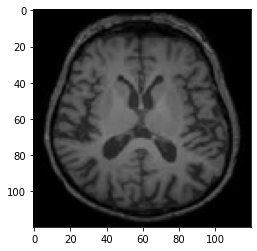

In [7]:
from PIL import Image 
# creating a object 
image = Image.open("../input/brain-mri-images-for-brain-tumor-detection/no/10 no.jpg")
image = image.resize((120,120))
plt.imshow(image)
plt.show()

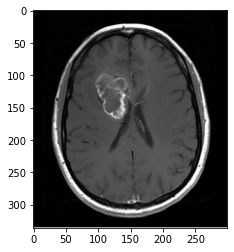

In [8]:
import cv2
path = "../input/brain-mri-images-for-brain-tumor-detection/yes/Y101.jpg"
img = cv2.imread(path)
plt.imshow(img)
plt.show()

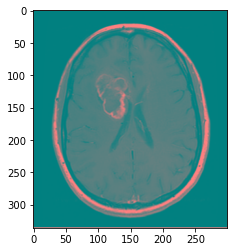

In [9]:
lab_image = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(lab_image)
plt.imshow(lab_image)
plt.show()

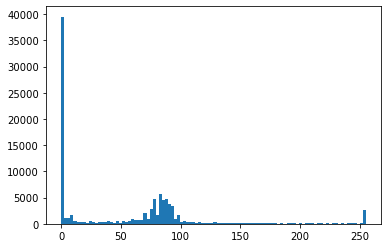

In [10]:
plt.hist(l.flat, bins=100, range=(0,255))
plt.show()

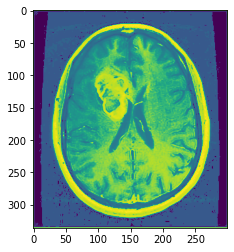

In [11]:
equ = cv2.equalizeHist(l)
plt.imshow(equ)
plt.show()

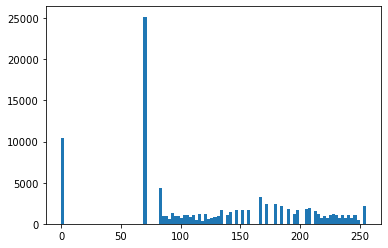

In [12]:
plt.hist(equ.flat, bins=100, range=(0,255))
plt.show()

In [13]:
updated_lab_img = cv2.merge((equ,a,b))

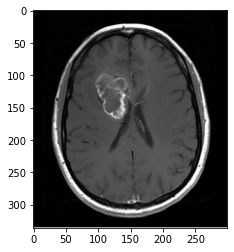

In [14]:
hist_eq_img = cv2.cvtColor(updated_lab_img,cv2.COLOR_LAB2BGR)
###########CLAHE#########################
#Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)
#plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
plt.imshow(img)
plt.show()

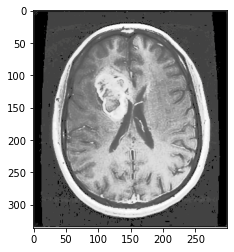

In [15]:
plt.imshow(hist_eq_img)
plt.show()

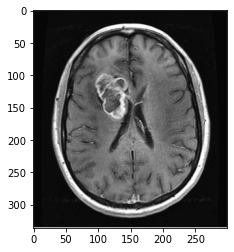

In [16]:
plt.imshow(CLAHE_img)
plt.show()

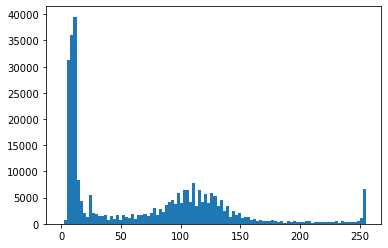

In [17]:
plt.hist(CLAHE_img.flat, bins=100, range=(0,255))
plt.show()

In [18]:
def CLAHE(img):
    lab_image = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
    l,a,b = cv2.split(lab_image)
    equ = cv2.equalizeHist(l)
    updated_lab_img = cv2.merge((equ,a,b))
    hist_eq_img = cv2.cvtColor(updated_lab_img,cv2.COLOR_LAB2BGR)
    ###########CLAHE#########################
    #Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(l)
    #plt.hist(clahe_img.flat, bins=100, range=(0,255))

    #Combine the CLAHE enhanced L-channel back with A and B channels
    updated_lab_img2 = cv2.merge((clahe_img,a,b))

    #Convert LAB image back to color (RGB)
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
    return CLAHE_img

In [19]:
def equalized(img):
    lab_image = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
    l,a,b = cv2.split(lab_image)
    equ = cv2.equalizeHist(l)
    return equ

In [20]:
def loadtheimages(ims1):
    # Importing images
    def importing_data(path):
        sample = []
        for filename in glob.glob(path):
            img1 = cv2.imread(filename)
#             img = CLAHE(img1)
            img = equalized(img1)
            res = cv2.resize(img, dsize=(ims1, ims1), interpolation=cv2.INTER_LINEAR)
            img = np.array(res)
            IMG = img.ravel()
            sample.append(IMG)
        return sample
    t = time.time()
    train_n = []
    train_y = []
    print("importing images")
    path1 = '//kaggle/input/brain-tumor-detection/no/*.jpg'
    path2 = '//kaggle/input/brain-tumor-detection/yes/*.jpg'
    x = (importing_data(path1))
    for i in x:
        train_n.append(i)
    print("1 out of 11 done")
    x = (importing_data(path2))
    for i in x:
        train_y.append(i)
    print("2 out of 11 done")
    # Importing more images into the dataset
    path11 = '//kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/*.jpg'
    path21 = '//kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/*.jpg'
    path31 = '//kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/*.jpg'
    path41 = '//kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/*.jpg'
    x = (importing_data(path41))
    for i in x:
        train_n.append(i)
    print("3 out of 11 done")
    x = (importing_data(path11))
    for i in x:
        train_y.append(i)
    print("4 out of 11 done")
    x = (importing_data(path21))
    for i in x:
        train_y.append(i)
    print("5 out of 11 done")
    x = (importing_data(path31))
    for i in x:
        train_y.append(i)
    print("6 out of 11 done")
    # Importing more images into the dataset
    path11 = '//kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/*.jpg'
    path21 = '//kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/*.jpg'
    path31 = '//kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/*.jpg'
    x = (importing_data(path11))
    for i in x:
        train_y.append(i)
    print("7 out of 11 done")
    x = (importing_data(path21))
    for i in x:
        train_y.append(i)
    print("8 out of 11 done")
    x = (importing_data(path31))
    for i in x:
        train_y.append(i)
    print("9 out of 11 done") 
    # Importing more images into the dataset
    pathy = '//kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/*.jpeg'
    pathn = '//kaggle/input/brain-mri-images-for-brain-tumor-detection/no/*.jpeg'
    x = (importing_data(pathn))
    for i in x:
        train_n.append(i)
  
    print("10 out of 11 done") 
    x = (importing_data(pathy))
    for i in x:
        train_y.append(i)

    print("11 out of 11 done")
    print("combining images")
    # Combining the data
    print("data is: ",len(train_n),len(train_y))
    df_train_n = pd.DataFrame({'image':train_n, 'label': 'Healthy'})
    df_train_y = pd.DataFrame({'image':train_y, 'label': 'Affected'})
    train_data = df_train_n.append(df_train_y,ignore_index=True)
    print("time taken to load all images:",time.time()-t)
    return train_data

In [21]:
def remove_outlier(train_data):
    # Ignoring images that are very oddly shaped to avoid outliers
    c = 1
    igs = []
    for i in range(len(train_data)):
        if(len(train_data.image[i])!=(3*ims1*ims1)):
    #         print(c,i)
            c = c + 1
            igs.append(i)
    # print(igs)
    print(len(igs), "images were removed from dataset")
    train_data=train_data.drop(igs,axis=0)
    return train_data


In [22]:
def xysplit_traindata(train_data):    
    x_train = []
    for tdim in train_data.image:
        x_train.append(tdim)
    y_train = np.array(train_data.label)
    y_traind = []
    for i in range(len(y_train)):
        if(y_train[i]=="Healthy"):
            y_traind.append(0)
        else:
            y_traind.append(1)
    x_traind = np.array(x_train)

    # One hot encoding
    CLASSES = 2
    y_train = np.zeros([len(y_traind), CLASSES])
    for i in range(len(y_traind)):
            y_train[i][y_traind[i]] = 1
    return x_traind,y_train

In [23]:
def test_train_split(x_traind,y_train,tts):
    # Test train splitting
    from sklearn.model_selection import train_test_split

    x_train, x_test, y_train, y_test = train_test_split(x_traind, y_train, test_size=tts)
#     print('Train size: {train}, Test size: {test}'.format(train=len(x_train), test=len(x_test)))

    # Changing to Matrix format
    x_train=np.matrix(x_train)
    x_test=np.matrix(x_test)
    y_train=np.matrix(y_train)
    y_test=np.matrix(y_test)
    return x_train,x_test,y_train,y_test

In [24]:
def input_to_hidden(x,Win,rel):
    a = np.dot(x, Win)
    a = np.maximum(a, rel, a) # ReLU activation
    return a

def predict(x,Win,Wout,rel):
    t = time.time()
    x = input_to_hidden(x,Win,rel)
    y = np.dot(x, Wout)
    tt = time.time()-t
#     print("time taken for prediction:",tt)
    return y,tt

In [25]:
def ELM_model(x_train,y_train,hu,rel):
    t = time.time()
    INPUT_LENGTH = x_train.shape[1]
    HIDDEN_UNITS = hu #hidden units

    Win = np.random.normal(size=[INPUT_LENGTH, HIDDEN_UNITS])
    Win = np.matrix(Win)
    X = input_to_hidden(x_train,Win,rel)
    Xt = np.transpose(X)
    # Moore-Penrose pseudo inverse

    www1 = np.dot(Xt, X)

    b = np.identity(len(np.array(www1)))
    b = np.dot(b,3)

    www1 = www1 + b
    ww1 = np.linalg.inv(www1)
    ww2 = np.dot(Xt, y_train)

    Wout = np.dot(ww1, ww2)
#     print("time taken to build model is",time.time()-t)
    return Win,Wout

In [26]:
def accuracy_show(y,y_test):
    correct = 0
    total = y.shape[0]
    for i in range(total):
        predicted = np.argmax(y[i])
        test = np.argmax(y_test[i])
        correct = correct + (1 if predicted == test else 0)
    acc = correct*100/total
#     print('Accuracy: {:f}'.format(acc))
    return acc
    

In [27]:
def functions_assemble(ims1,tts,hu,relu):
    train_data = loadtheimages(ims1)
    train_data = remove_outlier(train_data)
    x_traind,y_train = xysplit_traindata(train_data)
    x_train,x_test,y_train,y_test = test_train_split(x_traind,y_train,tts)
    Win,Wout = ELM_model(x_train,y_train,hu,rel)
    y,tt = predict(x_test,Win,Wout,rel)
    acc = accuracy_show(y,y_test)
    return acc,tt

In [28]:
def till_split(ims1):
    train_data = loadtheimages(ims1)
#     train_data = remove_outlier(train_data)
    x_traind,y_train = xysplit_traindata(train_data)
    return x_traind,y_train
def do_all_after_split(x_traind,y_train,hu,rel,tts):
    x_train,x_test,y_train,y_test = test_train_split(x_traind,y_train,tts)
    Win,Wout = ELM_model(x_train,y_train,hu,rel)
    y,tt = predict(x_test,Win,Wout,rel)
    acc = accuracy_show(y,y_test)
    return acc,tt

In [29]:
ims1 = 150
x_traind,y_train = till_split(ims1)

importing images
1 out of 11 done
2 out of 11 done
3 out of 11 done
4 out of 11 done
5 out of 11 done
6 out of 11 done
7 out of 11 done
8 out of 11 done
9 out of 11 done
10 out of 11 done
11 out of 11 done
combining images
data is:  1611 4264
time taken to load all images: 95.97977781295776


In [30]:
def populate(n):
    genes = []
    for i in range(n):
        hu = random.randint(hmin,hmax+1)
        rel = random.randint(rmin,rmax+1)
        tts = (random.randint(tmin,tmax+1))/100
        acc = 0
        tt = -1
        name = "gg"+ str(i)
        genes.append([10**6,hu,rel,tts,acc,tt,name])
    return genes

In [31]:
def fitness(gene):
    hu = gene[1]
    rel = gene[2]
    tts = gene[3]
    acc,tt = do_all_after_split(x_traind,y_train,hu,rel,tts)
    loss = 100-acc
    gene[4]=round(acc,5)
    gene[5]=round(tt*1000,2)
    fit_val = round((tt**0.5)*(loss**5),2)
    gene[0] = fit_val
    return gene

def whats_this_gene(gene):
    print("fitness:",gene[0])
    print("hidden units:",gene[1])
    print("accuracy:",gene[4]," percent")
    print("time taken:",gene[5]," ms")

In [32]:
# def crossover(g1,g2):
#     gg1,gg2 = g1,g2
#     r = random.randint(1,100)
#     if(r>60):
#         gg1[3],gg2[3] = gg2[3],gg1[3]
#         return gg1,gg2
#     r = random.randint(1,100)
#     if(r>60):
#         gg1[1],gg2[1] = gg2[1],gg1[1]
#         return gg1,gg2
#     r = random.randint(1,100)
#     if(r>50):
#         gg1[2],gg2[2] = gg2[2],gg1[2]
#         return gg1,gg2
#     else:
#         gg1 = mutation(g1)
#         gg2 = mutation(g2)
#         return gg1,gg2

In [33]:
def crossover(g1,g2):
    gg1 = []
    gg2 = []
    for g in g1:
        gg1.append(g)
    
    for g in g2:
        gg2.append(g)
    
    r = random.randint(1,4)
    if r<=3:
        gg1[r],gg2[r] = gg2[r],gg1[r]
        return gg1,gg2
    else:
        gg1 = mutation(g1)
        gg2 = mutation(g2)
        return gg1,gg2

In [34]:
def mutation(g1):
    gg1 = g1
#     hmin,hmax = 300,2500
#     rmin,rmax = -11,11
#     tmin,tmax = 5,35
    hu = random.randint(hmin,hmax+1)
    rel = random.randint(rmin,rmax+1)
    tts = (random.randint(tmin,tmax+1))/100
    r = random.randint(1,100)
    if(r>75):
        gg1[1]= hu
        return gg1
    r = random.randint(1,100)
    if(r>75):
        gg1[2]=rel
        return gg1
    r = random.randint(1,100)
    if(r>75):
        gg1[3] =tts
        return gg1
    return gg1

In [35]:
def do_crossover(genes):
    for i in range(1,len(genes)-1,2):
        g1 = genes[i]
        g2 = genes[i+1]
        genes[i],genes[i+1] = crossover(g1,g2)
    return genes

In [36]:
def natural_selection(genes):
    x = (len(genes)//3)+1
    for i in range(x,len(genes)-1):
        genes[i]=genes[x-i]
    return genes

In [37]:
hmin,hmax = 200,800
rmin,rmax = -10,10
tmin,tmax = 5,25
gene = populate(1)
print(gene)
print(whats_this_gene(fitness(gene[0])))

[[1000000, 624, 6, 0.19, 0, -1, 'gg0']]
fitness: 90043.16
hidden units: 624
accuracy: 89.43599  percent
time taken: 468.4  ms
None


In [38]:
import time
gal = []
for ga_num in range(3):
    gen = 50
    pop = 7
    hmin,hmax = 200,2300
    rmin,rmax = -10,10
    tmin,tmax = 10,25
    genes = populate(pop)
    genmax = []
    for i in range(gen):
        ttt = time.time()
        print("generation:",i+1, "out of:",gen)
        for p in range(1,len(genes)):
            genes[p]=fitness(genes[p])
        genes=sorted(genes)
    #     print("top 3 genes are\n",genes[0:3])
        genmax.append([genes[0][0],genes[0][1],genes[0][2],genes[0][3],genes[0][4],genes[0][5]])
        genes = natural_selection(genes)
        genes = do_crossover(genes)
        tx = time.time()-ttt
    #     print("approx time left is:",tx*(gen-i-1)//60,"mins")
    #     print("genmax")
    #     for i in range(len(genmax)):
    #         print(i,":",genmax[i])
    #     print("-----------")
    genmax=sorted(genmax,reverse=True)
    for i in range(len(genmax)):
        print(i,":",genmax[i])
    gal.append(genmax)

generation: 1 out of: 50
generation: 2 out of: 50
generation: 3 out of: 50
generation: 4 out of: 50
generation: 5 out of: 50
generation: 6 out of: 50
generation: 7 out of: 50
generation: 8 out of: 50
generation: 9 out of: 50
generation: 10 out of: 50
generation: 11 out of: 50
generation: 12 out of: 50
generation: 13 out of: 50
generation: 14 out of: 50
generation: 15 out of: 50
generation: 16 out of: 50
generation: 17 out of: 50
generation: 18 out of: 50
generation: 19 out of: 50
generation: 20 out of: 50
generation: 21 out of: 50
generation: 22 out of: 50
generation: 23 out of: 50
generation: 24 out of: 50
generation: 25 out of: 50
generation: 26 out of: 50
generation: 27 out of: 50
generation: 28 out of: 50
generation: 29 out of: 50
generation: 30 out of: 50
generation: 31 out of: 50
generation: 32 out of: 50
generation: 33 out of: 50
generation: 34 out of: 50
generation: 35 out of: 50
generation: 36 out of: 50
generation: 37 out of: 50
generation: 38 out of: 50
generation: 39 out of

In [39]:
f,a = [],[]
for genmax1 in gal:
    genmax1 = sorted(genmax1,reverse = True)
    ff = []
    aa = []
    for i in range(len(genmax1)):
        ff.append(genmax1[i][0])
        aa.append(genmax1[i][4])
    f.append(ff)
    a.append(aa)

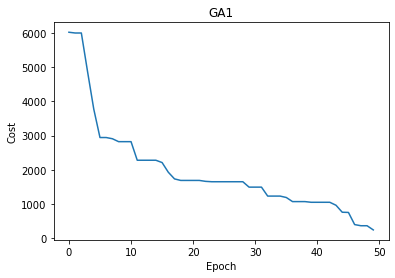

In [40]:
plt.plot(f[0])
plt.title('GA1')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

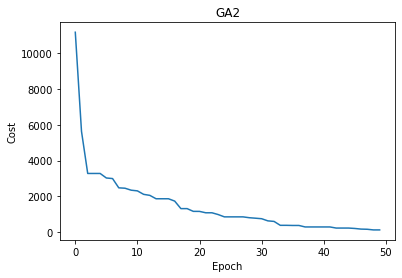

In [41]:
plt.plot(f[1])
plt.title('GA2')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

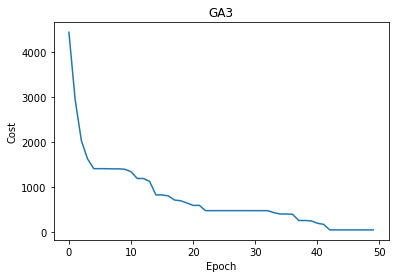

In [42]:
plt.plot(f[2])
plt.title('GA3')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

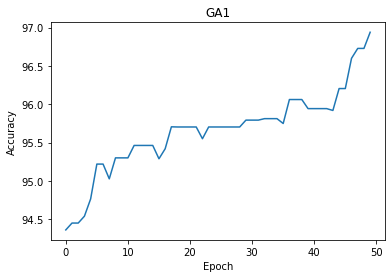

In [43]:
plt.plot(a[0])
plt.title('GA1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

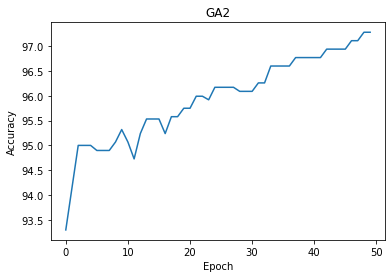

In [44]:
plt.plot(a[1])
plt.title('GA2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

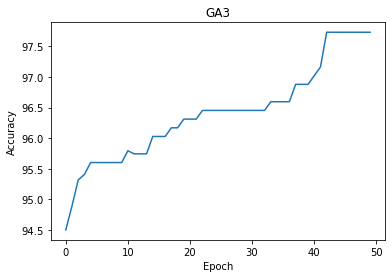

In [45]:
plt.plot(a[2])
plt.title('GA3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

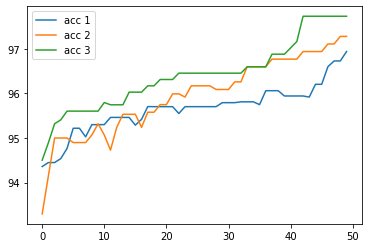

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# generate random data for plotting
x = [i for i in range(len(a[0]))]

# now there's 3 sets of points
y1 = a[0] # np.random.normal(scale=0.2,size=20)
y2 = a[1] # np.random.normal(scale=0.5,size=20)
y3 = a[2] # np.random.normal(scale=0.8,size=20)

# plot the 3 sets
plt.plot(x,y1,label='acc 1')
plt.plot(x,y2, label='acc 2')
plt.plot(x,y3, label='acc 3')

# call with no parameters
plt.legend()

plt.show()

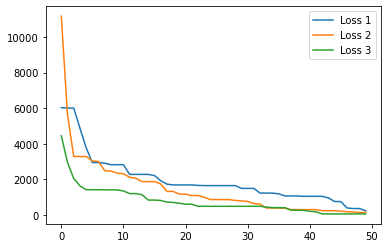

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# generate random data for plotting
x = [i for i in range(len(a[0]))]

# now there's 3 sets of points
y1 = f[0] # np.random.normal(scale=0.2,size=20)
y2 = f[1] # np.random.normal(scale=0.5,size=20)
y3 = f[2] # np.random.normal(scale=0.8,size=20)

# plot the 3 sets
plt.plot(x,y1,label='Loss 1')
plt.plot(x,y2, label='Loss 2')
plt.plot(x,y3, label='Loss 3')

# call with no parameters
plt.legend()

plt.show()